# Guided Project: Building A Handwritten Digits Classifier

### ***Lu Yang***
### ***05-31-2023***

Solution notebook can be referenced [here](https://github.com/dataquestio/solutions/blob/master/Mission244Solutions.ipynb).

## Introduction

As we mentioned in the first lesson in this course, deep neural networks have been used to reach state-of-the-art performance on **image classification** tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark. You can read about the history of deep neural networks [here](https://arxiv.org/pdf/1803.01164.pdf).

To end this course, we'll build models that can classify handwritten digits. Before the year 2000, institutions like the United States Post Office used handwriting recognition software to read addresses, zip codes, and more. One of their approaches, which consists of pre-processing handwritten images then feeding to a neural network model is detailed in this paper.

***Why is image classification a hard task?***

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

Here's an example of how an image is represented across the different abstractions we care about:
![](https://s3.amazonaws.com/dq-content/244/single_image.svg)

***Why is deep learning effective in image classification?***

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification and unfortunately out of scope for this course, which was trained to identify faces.

![](https://s3.amazonaws.com/dq-content/244/nn_learns_hierarchy.png)

You'll notice in the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this Guided Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Working With Image Data

In [2]:
## load dataset from sklearn

from sklearn.datasets import load_digits

digit_imgs = load_digits(as_frame = True) ## return as df

In [3]:
X = digit_imgs['data']
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

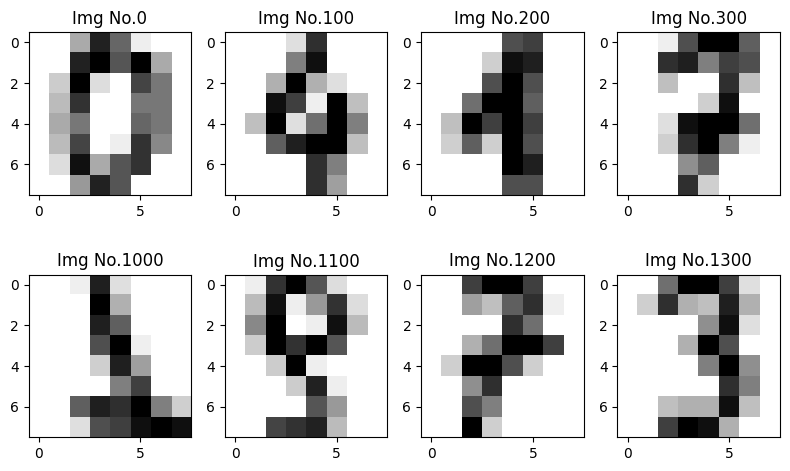

In [5]:
## Visualize some images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))

sample_imgs = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

for i, idx in enumerate(sample_imgs, 1):
    
    plt.subplot(2, 4, i)
    img = X.loc[idx].values.reshape(8,8)
    plt.imshow(img, cmap = 'gray_r')
    plt.title(f'Img No.{idx}')

plt.tight_layout()

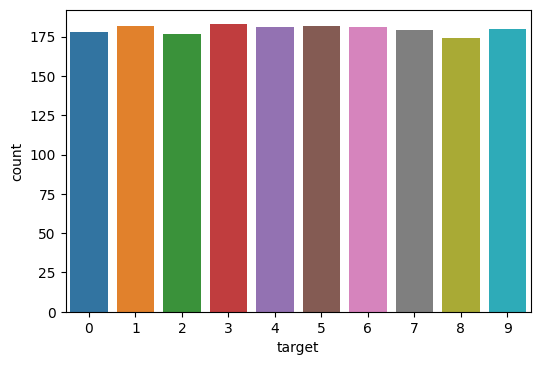

In [6]:
## Visualize digit labels

import seaborn as sns

y = digit_imgs['target']
sns.countplot(y)

## K-Nearest Neighbors Model

In [7]:
## Use a 4-fold cv

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

## use a Stratified K-Folds cross-validator with seed
skf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 1) 

knn_cv = cross_validate(knn, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)

print(knn_cv['train_score'].mean(), knn_cv['test_score'].mean())

0.9907252130792904 0.9860851274437021


In [8]:
## Examine the effect of n_neighbors in KNN

knn_test_acc = []

for k in range(1, 11):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn_cv = cross_validate(knn, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)
    
    train_score = knn_cv['train_score'].mean()
    test_score = knn_cv['test_score'].mean()
    
    print(f'For k = {k}, the mean train accuracy is {train_score :.4f}, the mean test accuracy is {test_score :.4f}.')
    knn_test_acc.append(test_score)
    

For k = 1, the mean train accuracy is 1.0000, the mean test accuracy is 0.9889.
For k = 2, the mean train accuracy is 0.9917, the mean test accuracy is 0.9861.
For k = 3, the mean train accuracy is 0.9928, the mean test accuracy is 0.9872.
For k = 4, the mean train accuracy is 0.9913, the mean test accuracy is 0.9850.
For k = 5, the mean train accuracy is 0.9907, the mean test accuracy is 0.9861.
For k = 6, the mean train accuracy is 0.9891, the mean test accuracy is 0.9833.
For k = 7, the mean train accuracy is 0.9885, the mean test accuracy is 0.9839.
For k = 8, the mean train accuracy is 0.9874, the mean test accuracy is 0.9833.
For k = 9, the mean train accuracy is 0.9874, the mean test accuracy is 0.9855.
For k = 10, the mean train accuracy is 0.9853, the mean test accuracy is 0.9816.


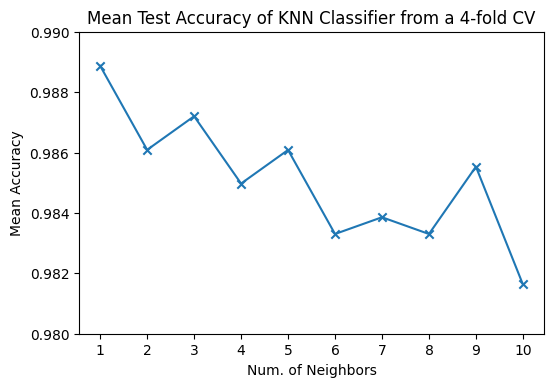

In [9]:
plt.scatter(list(range(1, 11)), knn_test_acc, marker = 'x')
plt.plot(list(range(1, 11)), knn_test_acc)
plt.xticks(range(1, 11))
plt.ylim([0.98, 0.99])
plt.xlabel('Num. of Neighbors')
plt.ylabel('Mean Accuracy')
plt.title('Mean Test Accuracy of KNN Classifier from a 4-fold CV')
plt.show()

There are a few downsides to using k-nearest neighbors:

* High memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* No model representation to debug and explore

## Neural Network With One Hidden Layer

In [10]:
## Use a 4-fold cv

from sklearn.neural_network import MLPClassifier

nn_1L = MLPClassifier(hidden_layer_sizes = (8,), max_iter = 100, random_state = 1) ## reproducible weight init
nn_1L_cv = cross_validate(nn_1L, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)

print(nn_1L_cv['train_score'].mean(), nn_1L_cv['test_score'].mean())

0.6937511152379505 0.6822469685721356


In [11]:
## Examine the effect of hidden_layer_sizes in 1L NN

import numpy as np

nn_1L_train_acc = []
nn_1L_test_acc = []

hls = np.power(2, range(3,9))
hls 

array([  8,  16,  32,  64, 128, 256])

In [12]:
for n in hls:
    
    nn_1L = MLPClassifier(hidden_layer_sizes = (n,), max_iter = 100, random_state = 1) ## reproducible weight init
    nn_1L_cv = cross_validate(nn_1L, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)
    
    train_score = nn_1L_cv['train_score'].mean()
    test_score = nn_1L_cv['test_score'].mean()
    
    print(f'For 1-layer NN with a hidden layer size of {n}, the mean train accuracy is {train_score :.4f}, the mean test accuracy is {test_score :.4f}.')
    
    nn_1L_train_acc.append(train_score)
    nn_1L_test_acc.append(test_score)

For 1-layer NN with a hidden layer size of 8, the mean train accuracy is 0.6938, the mean test accuracy is 0.6822.
For 1-layer NN with a hidden layer size of 16, the mean train accuracy is 0.9705, the mean test accuracy is 0.9410.
For 1-layer NN with a hidden layer size of 32, the mean train accuracy is 0.9889, the mean test accuracy is 0.9455.
For 1-layer NN with a hidden layer size of 64, the mean train accuracy is 1.0000, the mean test accuracy is 0.9627.
For 1-layer NN with a hidden layer size of 128, the mean train accuracy is 1.0000, the mean test accuracy is 0.9727.
For 1-layer NN with a hidden layer size of 256, the mean train accuracy is 1.0000, the mean test accuracy is 0.9772.


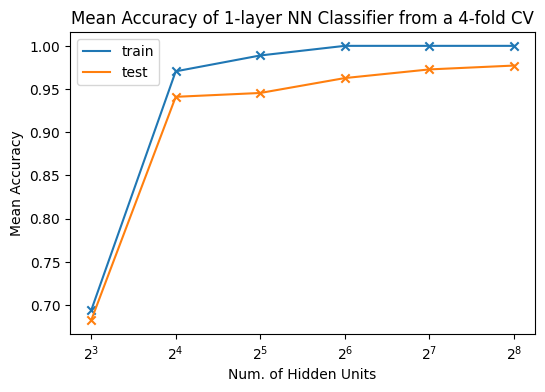

In [13]:
fig, ax = plt.subplots()

ax.scatter(hls, nn_1L_train_acc, marker = 'x')
ax.plot(hls, nn_1L_train_acc, label = 'train')
ax.scatter(hls, nn_1L_test_acc, marker = 'x')
ax.plot(hls, nn_1L_test_acc, label = 'test')
ax.legend()

ax.set_xscale('log', basex = 2)
ax.set_xlabel('Num. of Hidden Units')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracy of 1-layer NN Classifier from a 4-fold CV')

plt.show()

It appeared that a 1-layer NN did not have any substantial advantage over the KNN models. Starting from ~16 hidden units overfitting was observed with lower a testing accuracy than the training accuracy. 

## Neural Network With Two Hidden Layers

In [14]:
## Use a 4-fold cv

nn_2L = MLPClassifier(hidden_layer_sizes = (8,8), max_iter = 100, random_state = 1) ## reproducible weight init
nn_2L_cv = cross_validate(nn_2L, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)

print(nn_2L_cv['train_score'].mean(), nn_2L_cv['test_score'].mean())

0.8651517604788309 0.8358129175946548


In [15]:
## Examine the effect of hidden_layer_sizes in 2L NN

nn_2L_train_acc = []
nn_2L_test_acc = []

for n in hls:
    
    nn_2L = MLPClassifier(hidden_layer_sizes = (n,n), max_iter = 100, random_state = 1) ## reproducible weight init
    nn_2L_cv = cross_validate(nn_2L, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)
    
    train_score = nn_2L_cv['train_score'].mean()
    test_score = nn_2L_cv['test_score'].mean()
    
    print(f'For 2-layer NN with a hidden layer size of {n}, the mean train accuracy is {train_score :.4f}, the mean test accuracy is {test_score :.4f}.')
    
    nn_2L_train_acc.append(train_score)
    nn_2L_test_acc.append(test_score)

For 2-layer NN with a hidden layer size of 8, the mean train accuracy is 0.8652, the mean test accuracy is 0.8358.
For 2-layer NN with a hidden layer size of 16, the mean train accuracy is 0.9887, the mean test accuracy is 0.9410.
For 2-layer NN with a hidden layer size of 32, the mean train accuracy is 0.9998, the mean test accuracy is 0.9649.
For 2-layer NN with a hidden layer size of 64, the mean train accuracy is 1.0000, the mean test accuracy is 0.9688.
For 2-layer NN with a hidden layer size of 128, the mean train accuracy is 1.0000, the mean test accuracy is 0.9744.
For 2-layer NN with a hidden layer size of 256, the mean train accuracy is 1.0000, the mean test accuracy is 0.9794.


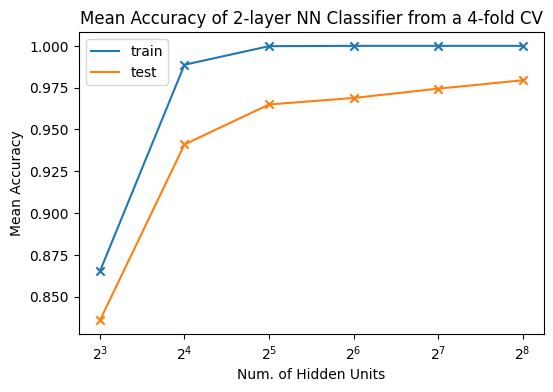

In [16]:
fig, ax = plt.subplots()

ax.scatter(hls, nn_2L_train_acc, marker = 'x')
ax.plot(hls, nn_2L_train_acc, label = 'train')
ax.scatter(hls, nn_2L_test_acc, marker = 'x')
ax.plot(hls, nn_2L_test_acc, label = 'test')
ax.legend()

ax.set_xscale('log', basex = 2)
ax.set_xlabel('Num. of Hidden Units')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracy of 2-layer NN Classifier from a 4-fold CV')

plt.show()

The 2-layer NN generally performed better than the 1-layer NN at the same hidden layer size when the hidden layer size was small. However, overfitting still existed throughout the models.

## Neural Network With Three Hidden Layers

In [17]:
## Use a 6-fold cv

skf = StratifiedKFold(n_splits = 6, shuffle = True, random_state = 1) 

nn_3L = MLPClassifier(hidden_layer_sizes = (16,16,16), max_iter = 100, random_state = 1) ## reproducible weight init
nn_3L_cv = cross_validate(nn_3L, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)

print(nn_3L_cv['train_score'].mean(), nn_3L_cv['test_score'].mean())

0.9897609341216179 0.9365626161278335


In [18]:
## Examine the effect of hidden_layer_sizes in 3L NN

nn_3L_train_acc = []
nn_3L_test_acc = []

for n in hls[:-1]:
    
    nn_3L = MLPClassifier(hidden_layer_sizes = (n,n,n), max_iter = 100, random_state = 1) ## reproducible weight init
    nn_3L_cv = cross_validate(nn_3L, X, y, scoring = 'accuracy', cv = skf, return_train_score = True)
    
    train_score = nn_3L_cv['train_score'].mean()
    test_score = nn_3L_cv['test_score'].mean()
    
    print(f'For 3-layer NN with a hidden layer size of {n}, the mean train accuracy is {train_score :.4f}, the mean test accuracy is {test_score :.4f}.')
    
    nn_3L_train_acc.append(train_score)
    nn_3L_test_acc.append(test_score)

For 3-layer NN with a hidden layer size of 8, the mean train accuracy is 0.8550, the mean test accuracy is 0.8214.
For 3-layer NN with a hidden layer size of 16, the mean train accuracy is 0.9898, the mean test accuracy is 0.9366.
For 3-layer NN with a hidden layer size of 32, the mean train accuracy is 1.0000, the mean test accuracy is 0.9555.
For 3-layer NN with a hidden layer size of 64, the mean train accuracy is 1.0000, the mean test accuracy is 0.9755.
For 3-layer NN with a hidden layer size of 128, the mean train accuracy is 1.0000, the mean test accuracy is 0.9805.


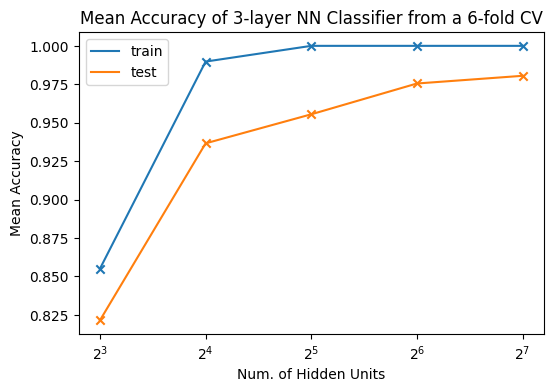

In [19]:
fig, ax = plt.subplots()

ax.scatter(hls[:-1], nn_3L_train_acc, marker = 'x')
ax.plot(hls[:-1], nn_3L_train_acc, label = 'train')
ax.scatter(hls[:-1], nn_3L_test_acc, marker = 'x')
ax.plot(hls[:-1], nn_3L_test_acc, label = 'test')
ax.legend()

ax.set_xscale('log', basex = 2)
ax.set_xlabel('Num. of Hidden Units')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Mean Accuracy of 3-layer NN Classifier from a 6-fold CV')

plt.show()

The performance of the 3-layer NN was in general similar to the 2-layer NN but slightly worse at smaller number of hidden units, possibly due to slower training speed of the 3-layer models. Minor overfitting still persisted. 